In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from scipy.optimize import curve_fit

In [3]:
def delta_Q(f, p, delta):
    """
    f: sympy expression
    p: list of sympy symbols (parameters)
    delta: list of uncertainties (numbers or sympy expressions)
    Returns: propagated uncertainty (symbolic or numeric)
    """
    terms = [(sp.diff(f, p_i) * delta_i)**2 for p_i, delta_i in zip(p, delta)]
    return sp.sqrt(sum(terms))

Proportionality constant: 8.888889e-03 ± 5.489247e-02 V/T


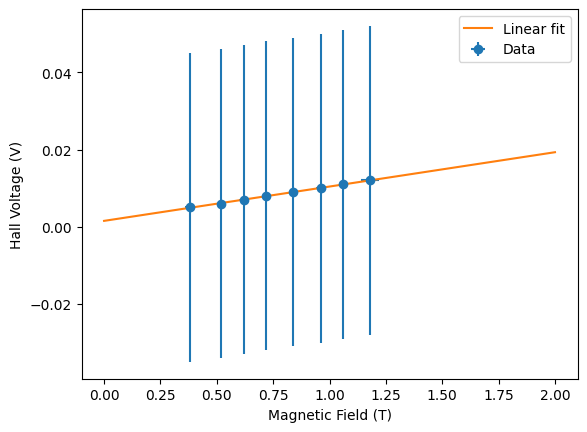

In [4]:
# Example Hall voltage data (replace with actual values if available)
hall_voltages = np.array([0.012, 0.011, 0.010, 0.009, 0.008, 0.007, 0.006, 0.005])  # Example values
magnetic_fields = np.array([1.18, 1.06, 0.960, 0.840, 0.720, 0.620, 0.520, 0.380])

delta1 = np.array([0.04,0.02,0.02,0.02,0.02,0.02,0.02,0.02])
delta2 = np.array([0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04])

# Linear fit: Hall voltage vs. magnetic field
def linear(x, m, b):
    return m * x + b

popt, pcov = curve_fit(linear, magnetic_fields, hall_voltages, sigma=delta2, absolute_sigma=True)
slope, intercept = popt
slope_err = np.sqrt(pcov[0,0])

print(f"Proportionality constant: {slope:.6e} ± {slope_err:.6e} V/T")

# Plot with error bars
plt.errorbar(magnetic_fields, hall_voltages, xerr=delta1, yerr=delta2, fmt='o', label='Data')
xfit = np.linspace(0, 2, 100)
plt.plot(xfit, linear(xfit, *popt), label='Linear fit')
plt.xlabel('Magnetic Field (T)')
plt.ylabel('Hall Voltage (V)')
plt.legend()
plt.show()

## Electric Fields of Various Electrode Geometries

     Charge (C)  Voltage (V)
0  8.096000e-11        7.360
1  5.520000e-11        5.040
2  3.680000e-11        3.360
3  1.840000e-11        1.880
4  7.360000e-12        0.728
5  3.680000e-12        0.396


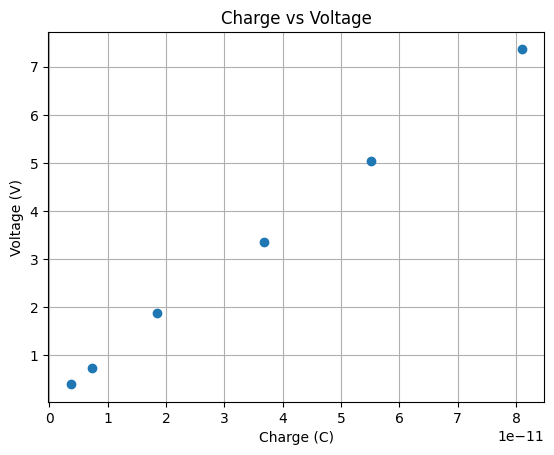

In [5]:
capFxnVoltAmpfVolt = [
    [22e-12, 3.68, 7.36],
    [15e-12, 3.68, 5.04],
    [10e-12, 3.68, 3.36],
    [5e-12, 3.68, 1.88],
    [2e-12, 3.68, 0.728],
    [1e-12, 3.68, 0.396]
]

# Calculate charge and corresponding voltage
chrgAmpfVolt = [[row[0] * row[1], row[2]] for row in capFxnVoltAmpfVolt]

# Display as a table
df_chrgAmpfVolt = pd.DataFrame(chrgAmpfVolt, columns=['Charge (C)', 'Voltage (V)'])
print(df_chrgAmpfVolt)

plt.errorbar(df_chrgAmpfVolt['Charge (C)'], df_chrgAmpfVolt['Voltage (V)'], yerr=0.01, fmt='o')
plt.xlabel('Charge (C)')
plt.ylabel('Voltage (V)')
plt.title('Charge vs Voltage')
plt.grid()
plt.show()
